# Mentoría
## Análisis y predicción de distribución troncal de energía

### Introducción

##### Análisis y Visualización
En la siguiente notebook, realizaremos la carga del dataset que utilizarán para el práctico de la materia. Para ello, comenzaremos con las importaciones pertinentes.
Posteriormente, se detallarán las consignas a seguir para la elaboración del informe.


In [ ]:
# Importación de las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.get_cachedir()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
import warnings

In [ ]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 150)
pd.set_option('max_colwidth', 151)
warnings.filterwarnings('ignore')

In [ ]:
#seteo pantas para q muestre hasta 6 decimales
pd.options.display.float_format = '{:.6f}'.format

## Revisión general de los datos

In [ ]:
#Parsing auxiliar
dateparse = lambda x: dt.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

In [ ]:
# _ds_energía
#_ds_energia = pd.read_csv('https://raw.githubusercontent.com/alaain04/diplodatos/master/data/distribucion.csv',
#                          dtype={'Amper fase T-A': float},
#                          parse_dates=['Fecha'],
#                          date_parser=dateparse,
#                          float_precision='round_trip')
_ds_energia = pd.read_csv('https://raw.githubusercontent.com/alaain04/diplodatos/master/data/distribucion.csv')

### DS Energía

In [ ]:

_ds_energia['hora'] = _ds_energia.Fecha.apply(lambda x: x[11:13])
_ds_energia['fecha_dia'] = _ds_energia.Fecha.apply(lambda x: x[0:10])
_ds_energia['Fecha'] = pd.to_datetime(_ds_energia['Fecha'],format='%Y-%m-%d %H:%M:%S')
_ds_energia.head(5)

,Fecha,Amper fase T-A,Amper fase S-A,Amper fase R-A,Vab,Vca,Vbc,Kwatts 3 fases,Factor de Poten-A,hora,fecha_dia
0,2020-03-01 00:00:00,0.000000,0.000000,0.000000,nan,nan,nan,3484.000000,0.940000,00,2020-03-01
1,2020-03-01 00:05:00,0.000000,0.000000,0.000000,nan,nan,nan,3449.000000,0.940000,00,2020-03-01
2,2020-03-01 00:10:00,0.000000,0.000000,0.000000,nan,nan,nan,3410.000000,0.940000,00,2020-03-01
3,2020-03-01 00:15:00,0.000000,0.000000,0.000000,nan,nan,nan,3437.000000,0.940000,00,2020-03-01
4,2020-03-01 00:20:00,0.000000,0.000000,0.000000,nan,nan,nan,3448.000000,0.940000,00,2020-03-01


In [ ]:
data_types = _ds_energia.dtypes
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
Fecha,datetime64[ns]
Amper fase T-A,float64
Amper fase S-A,float64
Amper fase R-A,float64
Vab,float64
Vca,float64
Vbc,float64
Kwatts 3 fases,float64
Factor de Poten-A,float64


In [ ]:
# Descripción
_ds_energia.describe(include = 'all')

,Fecha,Amper fase T-A,Amper fase S-A,Amper fase R-A,Vab,Vca,Vbc,Kwatts 3 fases,Factor de Poten-A,hora,fecha_dia
count,44363,44363.000000,44362.000000,44345.000000,35331.000000,35331.000000,35331.000000,43462.000000,44209.000000,44363,44363
unique,44363,nan,nan,nan,nan,nan,nan,nan,nan,24,156
top,2019-12-13 03:45:00,nan,nan,nan,nan,nan,nan,nan,nan,22,2020-02-22
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,1860,288
first,2019-12-03 20:45:00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
last,2020-05-07 11:10:00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN
mean,NaN,8.599689,8.667869,8.883414,345576.725031,345882.080176,346002.555692,-280996476.649487,0.445427,NaN,NaN
std,NaN,9.797469,9.859359,10.042508,789079.358601,789359.073205,789471.628564,724218113.835267,0.745922,NaN,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2147483647.000000,-0.980000,NaN,NaN
25%,NaN,0.000000,0.000000,0.000000,35.410000,37.370000,36.270000,-3927.000000,0.000000,NaN,NaN


#### Aclaraciones
* Features
    * **Fecha**: Dia/hora de la medición.
    * **Amper fase T-A, Amper fase S-A, Amper fase R-A**: Corrientes en cada una de las fases.
    * **Vab, Vca, Vbc**: Tensión relativa entre las fases.
    * **Kwatts 3 fases**: Potencia total.
    * **Factor de Potencia**: Constante.
    
* Términos
    * Corriente = intensidad [Amperes] 
    * Voltaje = tensión [Volts]
    * Potencia total [Kw]
    * Factor de potencia = Φ
    * Corriente total = Promedio de corrientes entre fases.
    * Tensión total = Promedio de tensiones entre fases.
    

### DS Clima

In [ ]:
# _ds_clima
_ds_clima = pd.read_csv('https://github.com/alaain04/diplodatos/raw/master/data/clima.csv',
                        parse_dates=['time'],
                        date_parser=dateparse)

In [ ]:
_ds_clima.head(5)

,time,temperature,dewpoint,humidity,precipitation,precipitation_3,precipitation_6,snowdepth,windspeed,peakgust,winddirection,pressure,condition
0,2019-11-01 00:00:00,20.100000,18.000000,88,nan,nan,nan,nan,6.100000,nan,125.000000,1014.300000,nan
1,2019-11-01 01:00:00,19.500000,17.800000,90,nan,nan,nan,nan,5.400000,nan,106.000000,1014.900000,nan
2,2019-11-01 02:00:00,19.200000,17.700000,91,nan,nan,nan,nan,4.300000,nan,83.000000,1015.600000,nan
3,2019-11-01 03:00:00,18.700000,17.700000,94,nan,nan,nan,nan,4.300000,nan,87.000000,1015.700000,nan
4,2019-11-01 04:00:00,18.000000,17.000000,94,nan,nan,nan,nan,6.100000,nan,91.000000,1016.200000,nan


In [ ]:
data_types = _ds_clima.dtypes
data_types = pd.DataFrame(data_types)
data_types = pd.DataFrame(data_types)
data_types = data_types.rename(columns = {0:'ReadingDataType'})
data_types.index.names = ['FieldName']
data_types

,ReadingDataType
FieldName,
time,datetime64[ns]
temperature,float64
dewpoint,float64
humidity,int64
precipitation,float64
precipitation_3,float64
precipitation_6,float64
snowdepth,float64
windspeed,float64


In [ ]:
_ds_clima.describe(include = 'all')

,time,temperature,dewpoint,humidity,precipitation,precipitation_3,precipitation_6,snowdepth,windspeed,peakgust,winddirection,pressure,condition
count,3001,3001.000000,3001.000000,3001.000000,0.000000,0.000000,0.000000,0.000000,2999.000000,0.000000,2999.000000,3001.000000,0.000000
unique,3001,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
top,2020-01-30 12:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
first,2019-11-01 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,2020-05-13 21:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,NaN,23.018294,15.841353,67.565811,nan,nan,nan,nan,6.595599,nan,144.830944,1012.926891,nan
std,NaN,5.485819,4.508826,19.787111,nan,nan,nan,nan,3.795323,nan,88.453037,4.166595,nan
min,NaN,4.700000,1.100000,18.000000,nan,nan,nan,nan,0.400000,nan,1.000000,1001.100000,nan
25%,NaN,19.700000,12.600000,53.000000,nan,nan,nan,nan,3.600000,nan,87.000000,1010.200000,nan


#### Aclaraciones
* API: https://api.meteostat.net
* Features
    * **time**: Día/hora de la medición. 
    * **temperature**: Temperatura [Celcius]
    * **dewpoint**: Punto de rocío [mm]
    * **humedity**: Humedad.
    * **precipitation, precipitation_3, precipitation_6**: Precipitación [mm]
    * **snowdepth**: Nieve caida [mm]
    * **winddirection**: Dirección del viento [Grados]
    * **pressure**: Presión atmosférica [mmHg]
    * **condition**: Condición [string]


###### Extra Tip
Pandas permite indexar el dataframe con el tipo PeriodIndex, el cual podemos utilizarlos para agrupar registros según la frecuancia definida (en este ejemplo 30 minutos).

```_data.index = pd.PeriodIndex(list(_data['Fecha']), freq='T')
_pt_period_mean = _data['Kwatts 3 fases'].resample('30T').mean()```

## Análisis y Visualización - Consigna

### General
Se propone la elaboración de un informe que deberá entregarse en formato html, pdf o markdown y deberá apuntar a un público técnico, pero sin conocimientos específicos en el tema. Añadir gráficos y conclusiones obtenidas durante el desarrollo del práctico.

### Análisis descriptivo
- Entender qué tipos de features poseen los dataset, cómo se relacionan entre ellos.
- Identificar features objetivo. 

### Análisis estadístico
- Ordenar temporalmente los dataset.
- Seleccionar al menos 3 features relevantes para el problema. Utilizar los gráficos y cálculos que le parezcan más apropiados para llegar a las conclusiones.

    - ¿Existen outliers para estos features?
    - ¿Hay valores faltantes?
    - ¿Hay valores negativos?
    - ¿Que decisión tomarían para completar o eliminar estos outliers y faltantes?
    - ¿Cómo es la distribución de las variables en el dataset?
    - ¿Se observa alguna estacionalidad?

- ¿Existe correlación entre las variables?
- ¿Que variables se correlacionan más con la potencia distribuida?

- Calidad del servicio: 
    - Frecuencia de corte del suministro. 
    - Duración de los cortes.
    - Franjas temporales con mayores cortes.
- Causas de corte de servicio:
    - Analizar que sucede con los demás features al momento de una corte.
    - Se observa alguna relación con la temperatura y velocidad/dirección del viento en estos períodos?
     
- Analizar el comportamiento de la distribución semalmente, es comparable mes a mes? La distribución de potencia, ¿se asemeja a alguna conocida?


### Preguntas adicionales
- ¿Cómo se comporta la distribución de energía ? ¿Qué relaciones observamos con los usos y costumbres del lugar? ¿Y con las condiciones atmosféricas?
- ¿Por qué se generan cortes en la distribución? ¿Se observa algún comportamiento anterior que nos anticipen estas caídas? 
- ¿Existen factores estacionales que influyen en las cargas de distribución? ¿Hubo algún cambio del comportamiento de consumo debido a la pandemia o en fechas festivas(navidad, año nuevo, etc)?
- ¿Qué información podemos incorporar a la planificación de mantenimientos de la línea?


In [ ]:
#Nuestro feature objetivo es identificar los cortes de energía y su duración.

#Elegimos features del dataset de Clima
_ds_clima.index = pd.PeriodIndex(list(_ds_clima['time']), freq='T')
ds_clima_hora = _ds_clima[['temperature','windspeed','winddirection']].resample('30T').fillna("backfill")
#Ordenamos valores
ds_clima_hora = ds_clima_hora.sort_index()
ds_clima_hora.head()

,temperature,windspeed,winddirection
2019-11-01 00:00,20.100000,6.100000,125.000000
2019-11-01 00:30,19.500000,5.400000,106.000000
2019-11-01 01:00,19.500000,5.400000,106.000000
2019-11-01 01:30,19.200000,4.300000,83.000000
2019-11-01 02:00,19.200000,4.300000,83.000000


In [ ]:
#Generamos Period Index y ordenamos el dataset de Energia
_ds_energia.index = pd.PeriodIndex(list(_ds_energia['Fecha']), freq='T')
_ds_energia = _ds_energia.sort_index()
_ds_energia.head()

,Fecha,Amper fase T-A,Amper fase S-A,Amper fase R-A,Vab,Vca,Vbc,Kwatts 3 fases,Factor de Poten-A,hora,fecha_dia
2019-12-03 20:45,2019-12-03 20:45:00,11.000000,11.000000,12.000000,2147483.650000,42.160000,40.940000,-2147483647.000000,0.000000,20,2019-12-03
2019-12-03 20:50,2019-12-03 20:50:00,11.000000,11.000000,11.000000,0.000000,2147483.650000,0.000000,-2147483647.000000,0.000000,20,2019-12-03
2019-12-03 20:55,2019-12-03 20:55:00,11.000000,11.000000,12.000000,2147483.650000,2147483.650000,2147483.650000,-2147483647.000000,-0.930000,20,2019-12-03
2019-12-03 21:00,2019-12-03 21:00:00,11.000000,11.000000,11.000000,2147483.650000,0.000000,2147483.650000,0.000000,0.000000,21,2019-12-03
2019-12-03 21:05,2019-12-03 21:05:00,10.000000,10.000000,11.000000,35.780000,36.540000,0.000000,-4342.000000,-0.510000,21,2019-12-03


In [ ]:
def get_dia_laboral(nombre_dia):
    if nombre_dia in ['Wednesday', 'Thursday', 'Friday', 'Monday','Tuesday']:
        return 'Dia laboral'
    else:
        return 'Fin de semana'

#Calculamos los valores absolutos de la Potencia
_ds_energia['abs_Kwatts'] = _ds_energia['Kwatts 3 fases'].abs()

#Calculamos los valores absolutos del Factor de Potencia
_ds_energia['abs_Potencia'] = _ds_energia['Factor de Poten-A'].abs()

#Creamos campos desagregados de la fecha para mejorar el análisis
_ds_energia['DiaSemana']=pd.to_datetime(_ds_energia.Fecha.dt.date).dt.day_name()
_ds_energia['minuto'] = _ds_energia.index.minute
_ds_energia['dia'] = _ds_energia.index.day
_ds_energia['mes'] = _ds_energia.index.month
_ds_energia['mes_desc'] = pd.to_datetime(_ds_energia.Fecha.dt.date).dt.month_name()
_ds_energia['anio'] = _ds_energia.index.year
_ds_energia['es_dia_laboral'] = _ds_energia['DiaSemana'].apply(lambda x:get_dia_laboral(x))

#Evaluamos si hubo un corte de energia (o sea, si la potencia total es igual a 0)
_ds_energia['corte_energia'] = _ds_energia.abs_Kwatts==0

#Cambiamos outliers sólo en columna nueva
#Evaluamos si hay los outliers de la potencia
_ds_energia['outlier_Kwatts'] = _ds_energia.abs_Kwatts>7.019000e+03

#Decidimos reemplazar los valores outliers de Potencia por 0 ya que consideramos que fue un error de medición y que para poder graficar los datos, necesitamos que no estén.
_ds_energia.loc[_ds_energia['outlier_Kwatts']==True, 'abs_Kwatts'] = 0

#Elimino datos del día 3/12/2019 para comenzar un dia completo
_ds_energia.drop(_ds_energia[pd.to_datetime(_ds_energia['Fecha'].dt.date)=='2019-12-03'].index,inplace=True)


In [ ]:
#Agrupamos los datos cada media hora
ds_energia_hora=_ds_energia.resample('30T',).max()
ds_energia_hora.dtypes

Fecha                datetime64[ns]
Amper fase T-A              float64
Amper fase S-A              float64
Amper fase R-A              float64
Vab                         float64
Vca                         float64
Vbc                         float64
Kwatts 3 fases              float64
Factor de Poten-A           float64
hora                         object
fecha_dia                    object
abs_Kwatts                  float64
abs_Potencia                float64
DiaSemana                    object
minuto                      float64
dia                         float64
mes                         float64
mes_desc                     object
anio                        float64
es_dia_laboral               object
corte_energia               float64
outlier_Kwatts              float64
dtype: object

In [ ]:
#Unimos datasets y elegimos los features a analizar: potencia absoluta, media de las tensiones y media de las corrientes, temperatura, velocidad y dirección del viento.
ds_unificado=ds_energia_hora.join(ds_clima_hora)#[['fecha_dia','mes_desc','hora','es_dia_laboral','abs_Kwatts','temperature','windspeed','winddirection','Amper fase T-A','Vab','Vca','Vbc']]

ds_unificado[ds_unificado.corte_energia==1].head()


,Fecha,Amper fase T-A,Amper fase S-A,Amper fase R-A,Vab,Vca,Vbc,Kwatts 3 fases,Factor de Poten-A,hora,fecha_dia,abs_Kwatts,abs_Potencia,DiaSemana,minuto,dia,mes,mes_desc,anio,es_dia_laboral,corte_energia,outlier_Kwatts,temperature,windspeed,winddirection
2019-12-04 09:00,2019-12-04 09:25:00,4.000000,5.000000,5.000000,2147483.650000,2147483.650000,2147483.650000,0.000000,0.000000,09,2019-12-04,0.000000,0.000000,Wednesday,25.000000,4.000000,12.000000,December,2019.000000,Dia laboral,1.000000,1.000000,21.100000,3.200000,87.000000
2019-12-04 15:00,2019-12-04 15:25:00,0.000000,0.000000,0.000000,2147483.650000,2147483.650000,2147483.650000,0.000000,0.000000,15,2019-12-04,0.000000,0.000000,Wednesday,25.000000,4.000000,12.000000,December,2019.000000,Dia laboral,1.000000,1.000000,27.000000,9.700000,6.000000
2019-12-04 15:30,2019-12-04 15:55:00,0.000000,0.000000,0.000000,2147483.650000,2147483.650000,2147483.650000,0.000000,0.000000,15,2019-12-04,5796.000000,0.690000,Wednesday,55.000000,4.000000,12.000000,December,2019.000000,Dia laboral,1.000000,0.000000,28.700000,8.600000,3.000000
2019-12-04 16:00,2019-12-04 16:25:00,10.000000,10.000000,10.000000,37.720000,39.230000,38.080000,0.000000,-0.380000,16,2019-12-04,4360.000000,0.650000,Wednesday,25.000000,4.000000,12.000000,December,2019.000000,Dia laboral,1.000000,1.000000,28.700000,8.600000,3.000000
2019-12-04 16:30,2019-12-04 16:55:00,16.000000,16.000000,16.000000,2147483.650000,2147483.650000,2147483.650000,0.000000,0.000000,16,2019-12-04,4301.000000,0.920000,Wednesday,55.000000,4.000000,12.000000,December,2019.000000,Dia laboral,1.000000,1.000000,29.600000,7.600000,37.000000


### Outliers y Nulos

Al analizar los outliers, vemos que ocurren más que nada al comienzo del datasets, probablemente porque se dieron errores de medición en los instrumentos y que influyó mucho la puesta en funcionamiento de la nueva línea troncal. 
Tambien visualizamos que los valores faltantes en la Potencia y corriente no son tan significativos como sí lo son en el caso de las columnas de tensiones, donde representan un 20% del dataset.
En el dataset de clima, los valores faltantes no son representativos.

In [ ]:
#Cantidades de valores sin nulos
_ds_energia.count()

Fecha                44324
Amper fase T-A       44324
Amper fase S-A       44323
Amper fase R-A       44306
Vab                  35292
Vca                  35292
Vbc                  35292
Kwatts 3 fases       43423
Factor de Poten-A    44170
hora                 44324
fecha_dia            44324
abs_Kwatts           43423
abs_Potencia         44170
DiaSemana            44324
minuto               44324
dia                  44324
mes                  44324
mes_desc             44324
anio                 44324
es_dia_laboral       44324
corte_energia        44324
outlier_Kwatts       44324
dtype: int64

In [ ]:
print('La Cantidad de outliers en Potencia es: '+str(len(_ds_energia[_ds_energia.outlier_Kwatts].abs_Kwatts)) + ", con un impacto de un " + str(len(_ds_energia[_ds_energia.outlier_Kwatts].abs_Kwatts)/len(_ds_energia.abs_Kwatts)*100) +"%.")
print('La Cantidad de Nan en Potencia es: '+str(len(_ds_energia[_ds_energia.abs_Kwatts.isna()].abs_Kwatts)) + ", con un impacto de un " + str(len(_ds_energia[_ds_energia.abs_Kwatts.isna()].abs_Kwatts)/len(_ds_energia.abs_Kwatts)*100) +"%.")
print('La Cantidad de Nan en las tensiones es: '+str(len(_ds_energia[_ds_energia.Vab.isna()].Vab)) + ", con un impacto de un " + str(len(_ds_energia[_ds_energia.Vab.isna()].Vab)/len(_ds_energia.abs_Kwatts)*100) +"%.")

print('La Cantidad de Nan en Ds_Clima.temperature es: '+str(_ds_clima.time.count() - _ds_clima.temperature.count()))
print('La Cantidad de Nan en Ds_Clima.windspeed es: '+str(_ds_clima.time.count() - _ds_clima.windspeed.count()))
print('La Cantidad de Nan en Ds_Clima.winddirection es: '+str(_ds_clima.time.count() - _ds_clima.winddirection.count()))

La Cantidad de outliers en Potencia es: 5671, con un impacto de un 12.794422886021117%.
La Cantidad de Nan en Potencia es: 901, con un impacto de un 2.0327587762837287%.
La Cantidad de Nan en las tensiones es: 9032, con un impacto de un 20.37722227235809%.
La Cantidad de Nan en Ds_Clima.temperature es: 0
La Cantidad de Nan en Ds_Clima.windspeed es: 2
La Cantidad de Nan en Ds_Clima.winddirection es: 2


#### Analizando los datos de la potencia distribuida
Podemos observar durante los meses de Diciembre y Enero, que en la variable "Kwatts 3 fases" hay muchos valores negativos y outliers también negativos, que no nos permiten observar cómo están distribuidos los datos por mes.


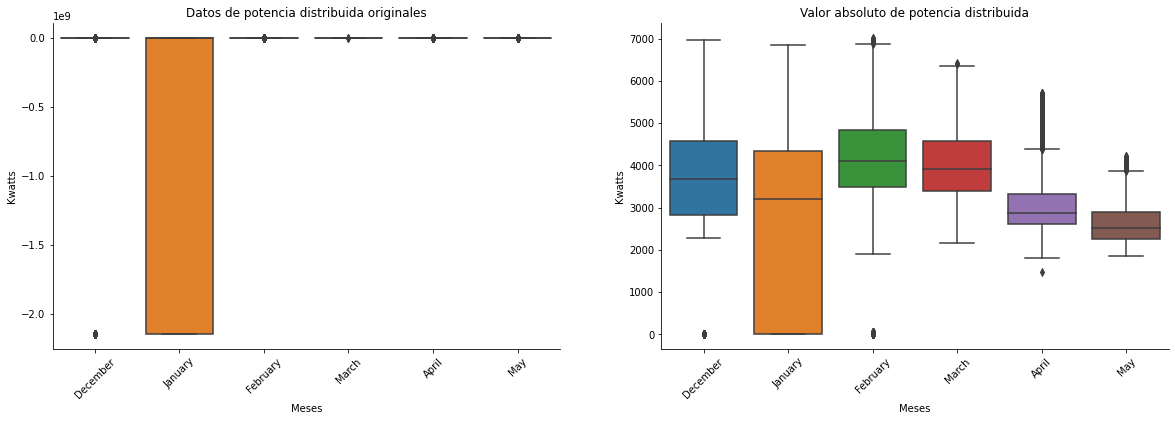

In [ ]:
#Vemos los outliers y Nan de la columna de potencia tal cual viene en el dataset vs La columna abs_Kwatts
#Al poner los outliers en 0 y sacar el valor absoluto de la potencia, se permite visualizar mejor la distribución
plt.figure(figsize=(20,6))

plt.subplot(1,2,1),sns.boxplot(data=_ds_energia,x='mes_desc',y='Kwatts 3 fases')
plt.xticks(rotation=45);
plt.title("Datos de potencia distribuida originales")
plt.xlabel('Meses')
plt.ylabel('Kwatts')

plt.subplot(1,2,2),sns.boxplot(data=_ds_energia,x='mes_desc',y='abs_Kwatts')
plt.xticks(rotation=45);

plt.title("Valor absoluto de potencia distribuida")
plt.xlabel('Meses')
plt.ylabel('Kwatts')
sns.despine()

### Análisis de Estacionalidad



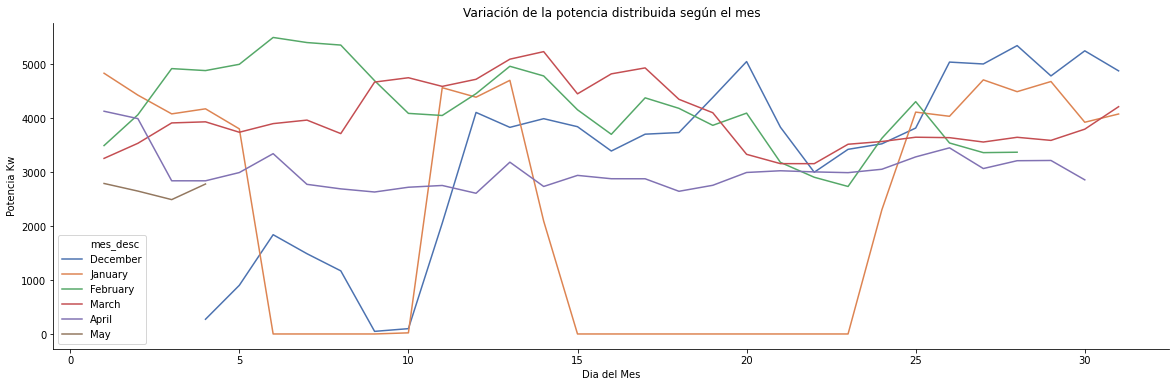

In [ ]:
#Distribución de consumo por dia del mes
plt.figure(figsize=(20,6))
sns.lineplot(data=_ds_energia, x='dia', y='abs_Kwatts',ci=None, hue='mes_desc', palette='deep')
plt.xlabel('Dia del Mes')
plt.ylabel('Potencia Kw')
plt.title('Variación de la potencia distribuida según el mes')
sns.despine()



Al querer ver los consumos por mes, para verificar si influyen las vacaciones y semana de navidad o fin de año, tenemos muchos errores de outliers que no hacen tan fiable la interpretación. Sin embargo, podemos ver a fines de diciembre y enero un aumento considerable respecto a los meses siguientes.

El marzo que no tuvo casi outliers, vemos un comportamiento consistente, donde tiene una caída drástica del consumo a partir del inicio de la cuarentena obligatoria (dia 20). En Abril vemos que se mantiene esa baja en el consumo.

[]

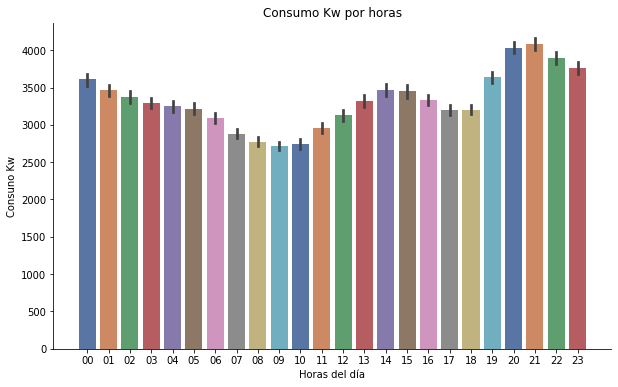

In [ ]:
#Graficamos el consumo por hora del dia

plt.figure(figsize=(10,6))
sns.barplot(data=_ds_energia, x=_ds_energia.hora, y=_ds_energia['abs_Kwatts'], palette='deep')
sns.despine()
plt.title("Consumo Kw por horas")
plt.xlabel('Horas del día')
plt.ylabel('Consuno Kw')
plt.plot()


Al comparar la potencia distribuida a lo largo de las horas de un día laborable vs el fin de semana, vemos que el consumo se mantiene bastante similar, excepto los fines de semana desde las 00 a las 5am que aumenta. En general, es coherente que el consumo aumente luego de las 18 hs, donde la mayoría de la gente vuelve a sus hogares y utiliza más electricidad para iluminación, cocción y entretenimiento.

[]

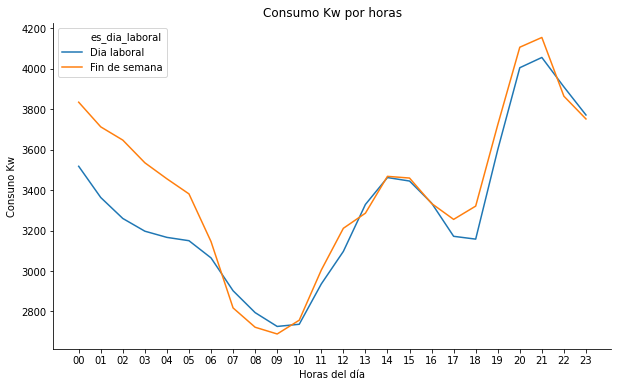

In [ ]:
#Consumos por horas según si es día laboral o fin de semana
plt.figure(figsize=(10,6))
sns.lineplot(data=_ds_energia, x=_ds_energia.hora, y=_ds_energia.abs_Kwatts,ci=None, hue=_ds_energia.es_dia_laboral)
sns.despine()
plt.title("Consumo Kw por horas")
plt.xlabel('Horas del día')
plt.ylabel('Consuno Kw')
plt.plot()

### Distribuciones de los features

Si queremos ver la distribución de la columna "Kwatts 3 fases", vemos que por los outliers y valores negativos no podemos interpretar correctamente el gráfico


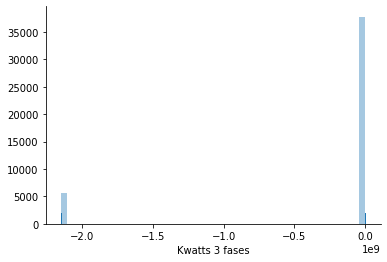

In [ ]:
sns.distplot(_ds_energia['Kwatts 3 fases'], kde=False, rug=True);
sns.despine()


Por eso realizamos la distribución de la columna abs_Kwatts.
Vemos que si no tuvieramos los cortes ni los errores de medición, probablemente tendería a una distribución más "normal".

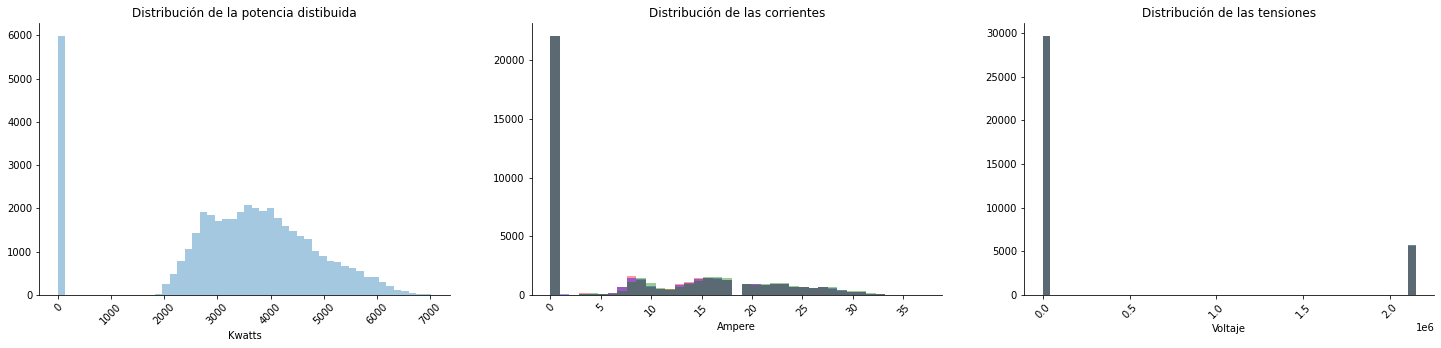

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1),sns.distplot(_ds_energia.abs_Kwatts, kde=False)
plt.xticks(rotation=45);
plt.title("Distribución de la potencia distibuida")
plt.xlabel('Kwatts')

plt.subplot(1, 3, 2),sns.distplot(_ds_energia['Amper fase T-A'], kde=False, color='RED')
plt.subplot(1, 3, 2),sns.distplot(_ds_energia['Amper fase S-A'], kde=False, color='BLUE')
plt.subplot(1, 3, 2),sns.distplot(_ds_energia['Amper fase R-A'], kde=False, color='GREEN')
plt.xticks(rotation=45);
plt.title("Distribución de las corrientes")
plt.xlabel('Ampere')

plt.subplot(1, 3, 3),sns.distplot(_ds_energia.Vab, kde=False, color='RED')
plt.subplot(1, 3, 3),sns.distplot(_ds_energia.Vbc, kde=False, color='BLUE')
plt.subplot(1, 3, 3),sns.distplot(_ds_energia.Vca, kde=False, color='GREEN')
plt.xticks(rotation=45);
plt.title("Distribución de las tensiones")
plt.xlabel('Voltaje')
sns.despine()

Graficamos las distribuciones de la temperatura, velocidad y dirección del viento, respectivamente. Observamos que la temperatura tiene una distribución normal, no así las otras 2 variables.


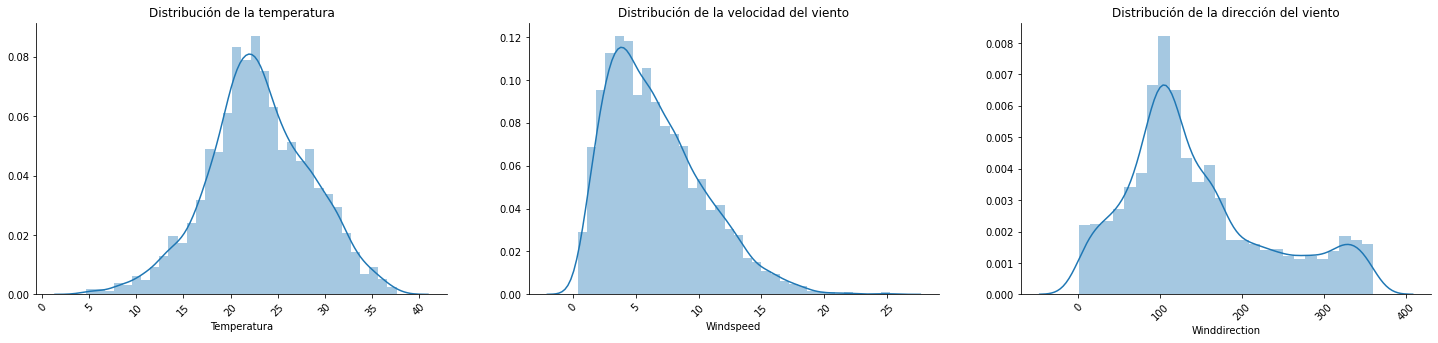

In [ ]:

plt.figure(figsize=(25,5))
plt.subplot(1, 3, 1),sns.distplot(_ds_clima.temperature, kde=True)
plt.xticks(rotation=45);
plt.title("Distribución de la temperatura")
plt.xlabel('Temperatura')

plt.subplot(1, 3, 2),sns.distplot(_ds_clima.windspeed, kde=True)
plt.xticks(rotation=45);
plt.title("Distribución de la velocidad del viento")
plt.xlabel('Windspeed')

plt.subplot(1, 3, 3),sns.distplot(_ds_clima.winddirection, kde=True)
plt.xticks(rotation=45);
plt.title("Distribución de la dirección del viento")
plt.xlabel('Winddirection')
sns.despine()

#### Conclusión sobre el primer análisis estadístico

Seleccionamos los siguientes features: 
1.   abs_Kwatts: es el valor absoluto de la potencia distribuida. Tuvimos que hacer esta columna ya que la original tenía muchos outliers y valores negativos. Estos valores ocurren en los días en que se estaba poniendo operativa esa línea troncal.
2.   temperature
3.   windspeed
4.   winddirection
5.   Amper fase T-A
6.   Vab
7.   Vca
8.   Vbc
9.   abs_Potencia: Factor de potencia en valor absoluto. Ya que este valor debería tener un rango de 0 a 1. Los valores negativos se deben a error de lectura de instrumentos o conexión invertida

Elegimos usar la función dropna para eliminar los Nan, pero en el caso de la potencia, tomamos los outliers como errores de medición y, al no podemos saber qué ocurrió en ese momento y necesitar graficar para poder identificar las causas de los cortes, decidimos reemplazarlos por valor 0. Para evitar confundirlos con un corte de servicio, hicimos la verificación de este feature previo al reemplazo del outlier.

### Correlación entre variables

Para analizar la correlacción entre los features hicimos un pairplot y calculamos el Coeficiente de correlación de Spearman


<Figure size 288x216 with 0 Axes>

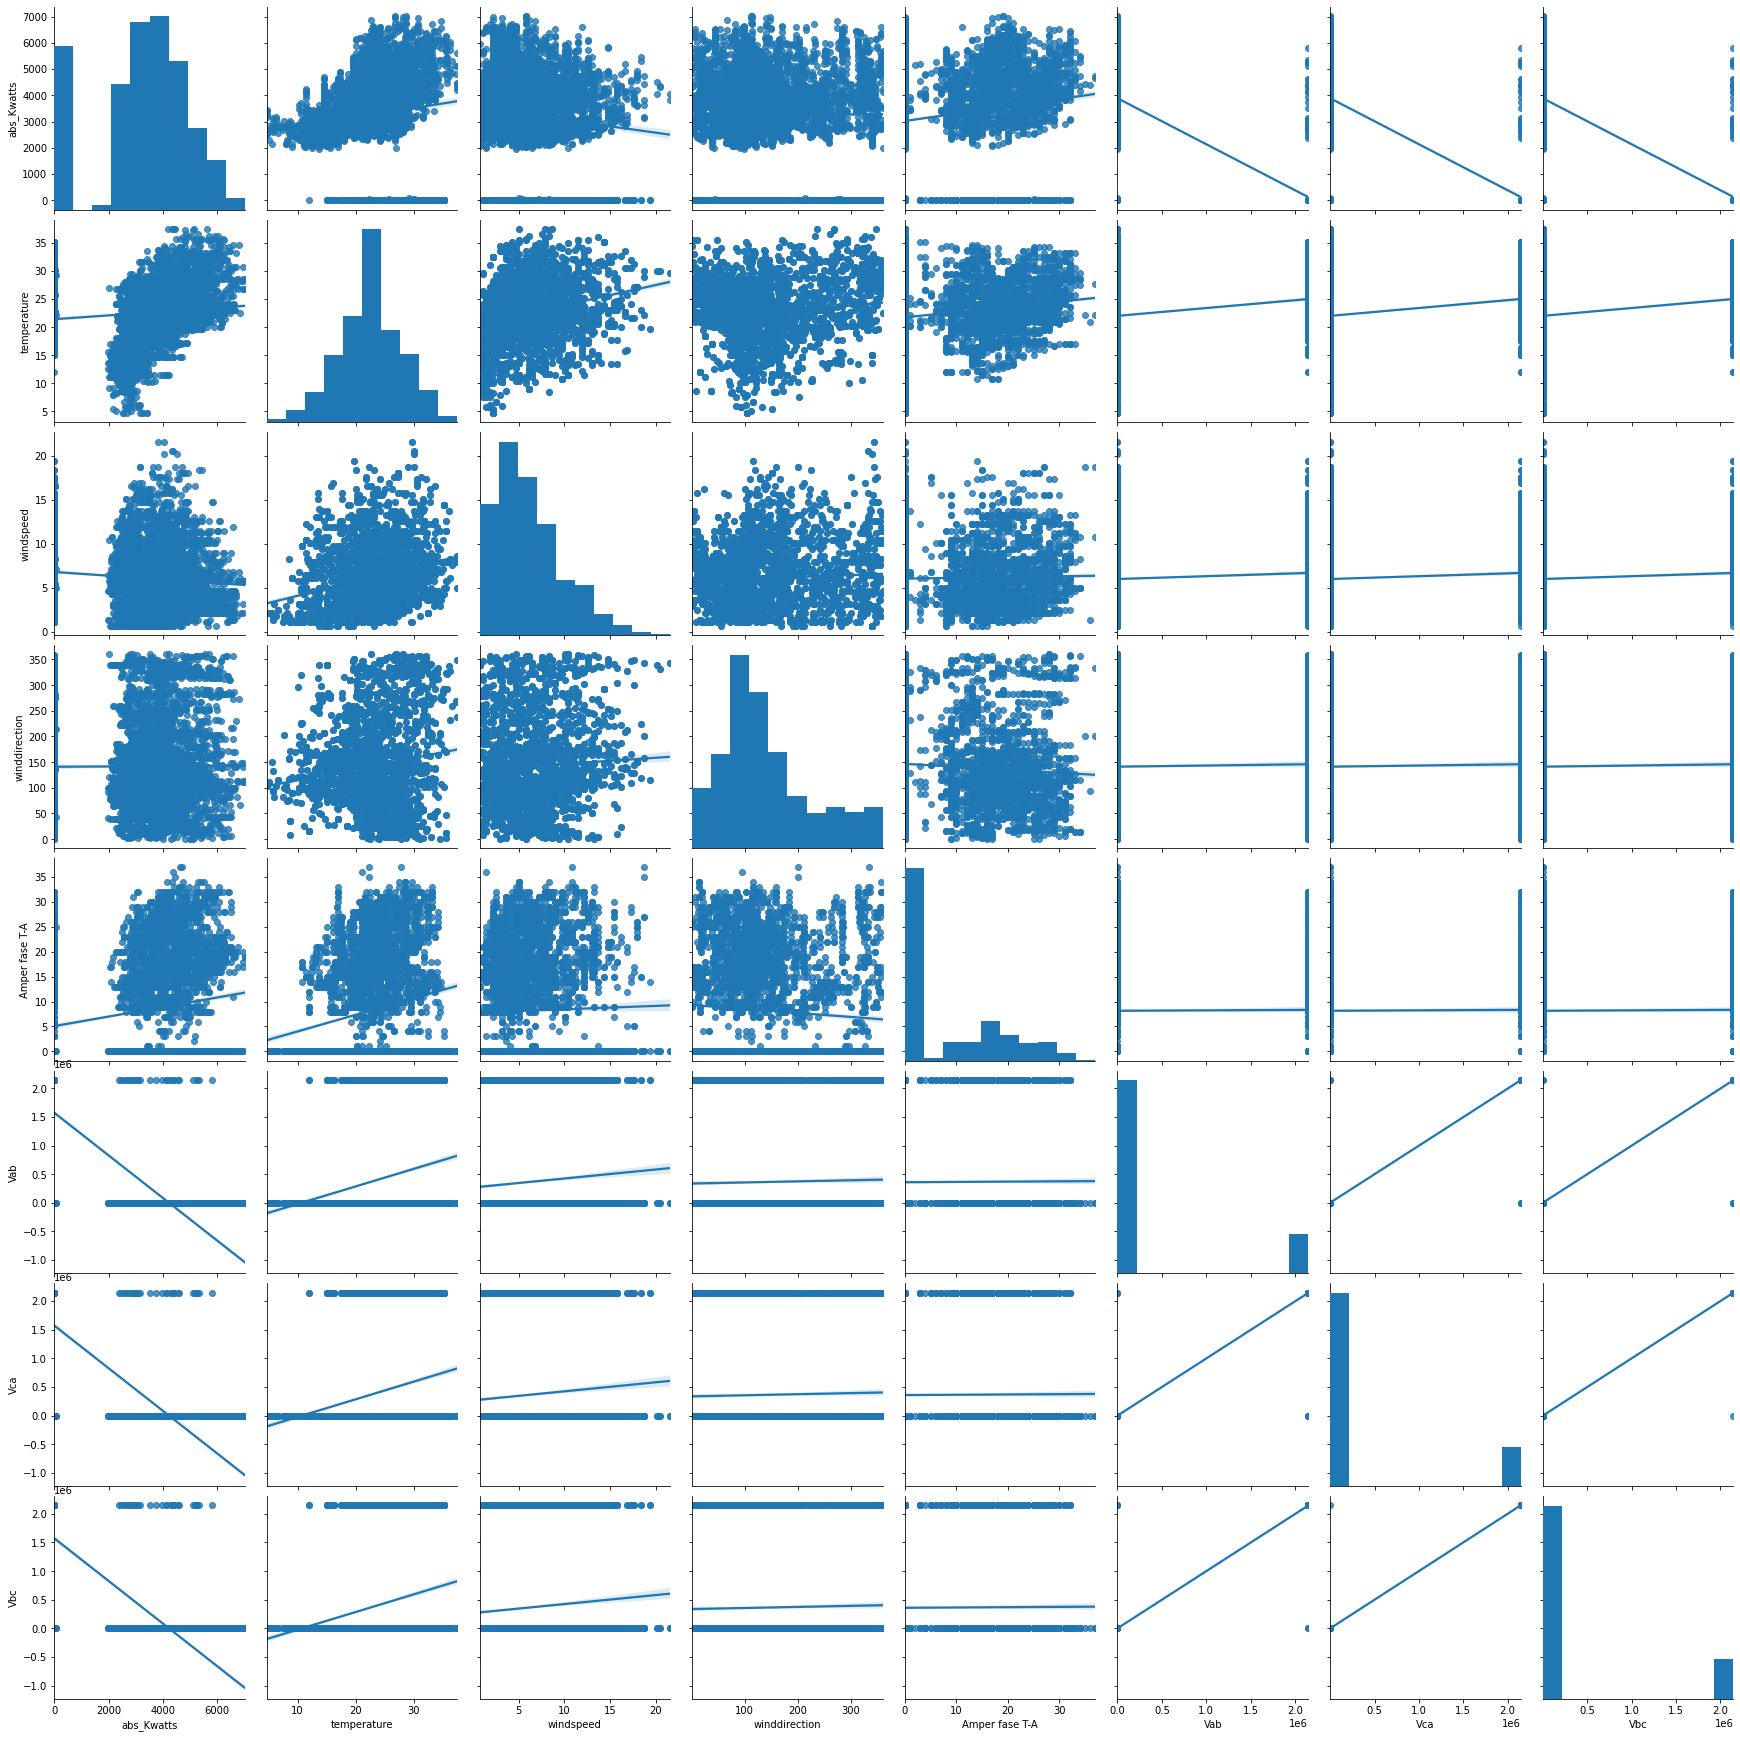

In [ ]:
# Gráfico pairplot para ver correlación entre variables. Sacamos Nan y 
plt.figure(figsize=(4,3))
sns.pairplot(
    data=ds_unificado.dropna(), kind='reg',
    vars=['abs_Kwatts', 'temperature','windspeed','winddirection','Amper fase T-A','Vab','Vca','Vbc'], 
    height=3)

In [ ]:
#Calculamos correlación con Spearman sin los nan
important = ['abs_Kwatts', 'temperature','windspeed','winddirection','Amper fase T-A','Vab','Vca','Vbc']
imp_data=ds_unificado[important].dropna()
imp_data.corr(method="spearman")

,abs_Kwatts,temperature,windspeed,winddirection,Amper fase T-A,Vab,Vca,Vbc
abs_Kwatts,1.000000,0.262467,-0.093201,0.041188,0.240735,-0.319571,-0.372776,-0.373148
temperature,0.262467,1.000000,0.247587,0.039648,0.163392,-0.043556,-0.094049,-0.085548
windspeed,-0.093201,0.247587,1.000000,0.024668,0.019167,-0.140273,-0.141687,-0.137496
winddirection,0.041188,0.039648,0.024668,1.000000,-0.050660,-0.037134,-0.053087,-0.041866
Amper fase T-A,0.240735,0.163392,0.019167,-0.050660,1.000000,-0.096734,-0.047400,-0.061885
Vab,-0.319571,-0.043556,-0.140273,-0.037134,-0.096734,1.000000,0.967364,0.969601
Vca,-0.372776,-0.094049,-0.141687,-0.053087,-0.047400,0.967364,1.000000,0.992769
Vbc,-0.373148,-0.085548,-0.137496,-0.041866,-0.061885,0.969601,0.992769,1.000000


[]

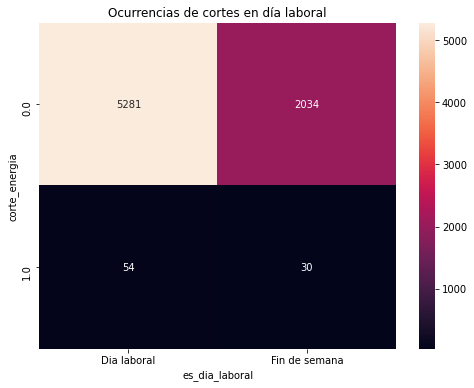

In [ ]:
plt.figure(figsize=(8,6))
exp = pd.crosstab(ds_unificado.corte_energia, ds_unificado.es_dia_laboral, dropna=True)

plt.title("Ocurrencias de cortes en día laboral")
sns.heatmap(exp, annot=True,fmt='g')
plt.plot()

Se pueden ver que hay una mayor cantidad de ocurrencias de cortes para los días de semana

#### Conclusión
Existe correlación (algo baja) entre la potencia y la temperatura, lo cual resulta lógico, ya que cuando hay más calor suele usarse más los ventiladores y aires acondicionados, que hacen elevar el consumo de kw. 

Vemos que ni la dirección ni la velocidad del viento están relacionadas con la potencia, por lo que podríamos desligarlos de que estos influyan directamente en el aumento del consumo.

Otra correlación, pero esta vez negativa, es entre la potencia y las tensiones. Esto es algo extraño ya que la pontencia es el múltiplo de la tensión y la corriente... por lo que debería haber una correlacción más alta y positiva (como sí hay entre corriente y potencia). Un causal de esta inconsistencia, puede deberse a los errores de los intrumentos de medición de la red.


### Calidad del servicio

La frecuencia de cortes fue mucho más alta al comienzo, probablemente por las tareas de puesta funcionamiento de toda la línea troncal. 

Al ver el gráfico con todos los cortes, vemos que previo a producirse uno hay un alto consumo de kw (mayor a 5000kw). 

In [ ]:
lista_dias_cortes = ds_unificado[ds_unificado.corte_energia!=0].fecha_dia.unique()
ds_cortes_servicio = ds_unificado[ds_unificado['fecha_dia'].isin(lista_dias_cortes)]
ds_cortes_servicio.describe(include='all')


,Fecha,Amper fase T-A,Amper fase S-A,Amper fase R-A,Vab,Vca,Vbc,Kwatts 3 fases,Factor de Poten-A,hora,fecha_dia,abs_Kwatts,abs_Potencia,DiaSemana,minuto,dia,mes,mes_desc,anio,es_dia_laboral,corte_energia,outlier_Kwatts,temperature,windspeed,winddirection
count,707,707.000000,707.000000,707.000000,698.000000,698.000000,698.000000,698.000000,698.000000,707,707,698.000000,698.000000,707,707.000000,707.000000,707.000000,707,707.000000,707,707.000000,707.000000,771.000000,771.000000,771.000000
unique,707,nan,nan,nan,nan,nan,nan,nan,nan,24,15,nan,nan,7,nan,nan,nan,3,nan,2,nan,nan,nan,nan,nan
top,2019-12-07 12:55:00,nan,nan,nan,nan,nan,nan,nan,nan,05,2020-01-20,nan,nan,Tuesday,nan,nan,nan,December,nan,Dia laboral,nan,nan,nan,nan,nan
freq,1,nan,nan,nan,nan,nan,nan,nan,nan,30,48,nan,nan,144,nan,nan,nan,371,nan,515,nan,nan,nan,nan,nan
first,2019-12-04 00:25:00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,nan
last,2020-02-15 23:55:00,nan,nan,nan,nan,nan,nan,nan,nan,NaN,NaN,nan,nan,NaN,nan,nan,nan,NaN,nan,NaN,nan,nan,nan,nan,nan
mean,NaN,9.442716,9.547383,9.820368,1335268.753195,1335269.302650,1338345.308997,-1153734134.650430,-0.033668,NaN,NaN,1703.553009,0.367564,NaN,39.957567,12.473833,6.908062,NaN,2019.475248,NaN,0.118812,0.612447,24.033982,5.803243,144.422827
std,NaN,8.749296,8.834099,9.007566,1042137.861102,1042137.156104,1041359.916930,1071525778.151753,0.539577,NaN,NaN,2194.054825,0.450366,NaN,15.058842,7.879427,5.363425,NaN,0.499740,NaN,0.323796,0.487537,4.457139,3.436255,95.647392
min,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.520000,-2147483647.000000,-0.980000,NaN,NaN,0.000000,0.000000,NaN,0.000000,1.000000,1.000000,NaN,2019.000000,NaN,0.000000,0.000000,12.000000,0.700000,1.000000
25%,NaN,0.000000,0.000000,0.000000,38.422500,40.472500,38.672500,-2147483647.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,25.000000,6.000000,1.000000,NaN,2019.000000,NaN,0.000000,0.000000,21.500000,3.200000,73.000000


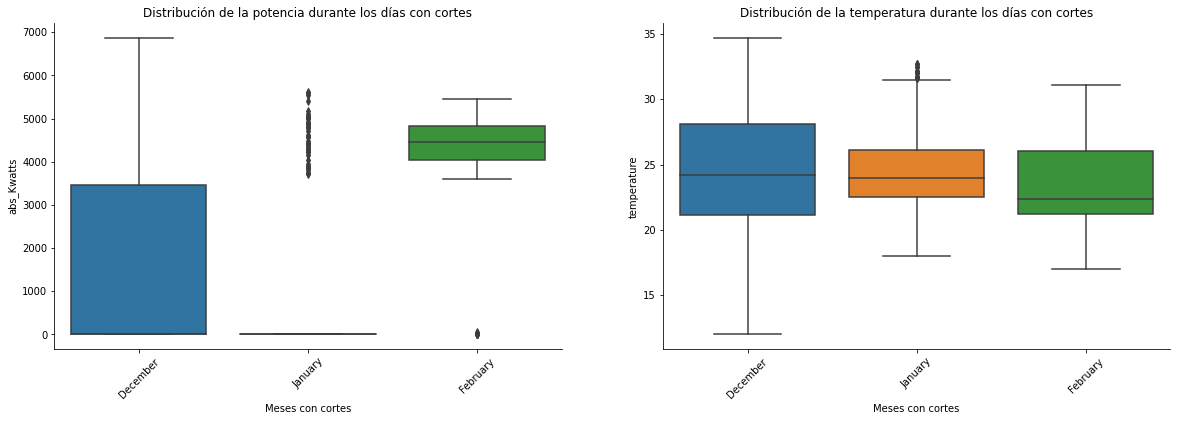

In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1),sns.boxplot(data=ds_cortes_servicio,x='mes_desc',y='abs_Kwatts')
plt.xticks(rotation=45);
plt.title("Distribución de la potencia durante los días con cortes")
plt.xlabel('Meses con cortes')

plt.subplot(1,2,2),sns.boxplot(data=ds_cortes_servicio,x='mes_desc',y='temperature')
plt.xticks(rotation=45);
plt.title("Distribución de la temperatura durante los días con cortes")
plt.xlabel('Meses con cortes')

sns.despine()

Vemos en estos gráficos de cajas, que los consumos de Kwatts en los meses de los cortes han sido bastantes dispares. En diciembre y enero, atribuimos estas varianzas a los errores de medición pero en el mes de febrero podemos ver que el 50% de los datos nos muestran un consumo alto entre 4000 y 5000 kwatts.

Sobre la temperatura, podemos ver en diciembre más amplitud térmica, desde temperaturas mínimas menores a 15 grados, hasta máximas mayores a los 35.
Los meses de enero y febrero, vemos menos amplitud, con valores de mínimas alrededor de los 18 grados y máximas de hasta 32. Esto debe haber generado mucho consumo eléctrico para contrarrestar temperaturas tan altas.




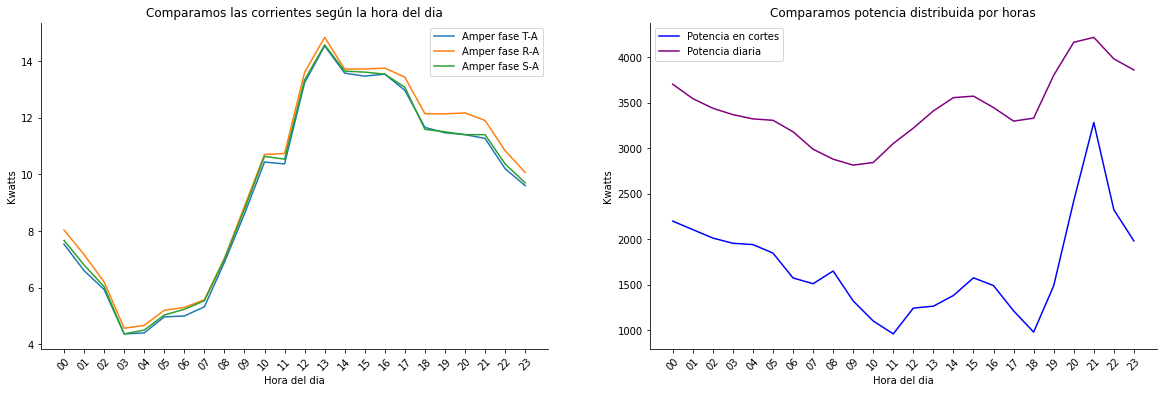

In [ ]:
#Graficamos potencia y las corrientes según la hora en los días que hubo cortes de servicio
plt.figure(figsize=(20,6))
plt.subplot(1,2,1),sns.lineplot(data=ds_cortes_servicio,x='hora',y='Amper fase T-A',ci=None,label='Amper fase T-A')
plt.subplot(1,2,1),sns.lineplot(data=ds_cortes_servicio,x='hora',y='Amper fase R-A',ci=None,label='Amper fase R-A')
plt.subplot(1,2,1),sns.lineplot(data=ds_cortes_servicio,x='hora',y='Amper fase S-A',ci=None,label='Amper fase S-A')
plt.xticks(rotation=45)
plt.title("Comparamos las corrientes según la hora del dia")
plt.xlabel('Hora del dia')
plt.ylabel('Kwatts')
plt.subplot(1,2,2),sns.lineplot(data=ds_cortes_servicio,x='hora',y='abs_Kwatts',ci=None, color='BLUE',label='Potencia en cortes')
plt.subplot(1,2,2),sns.lineplot(data=ds_unificado,x='hora',y='abs_Kwatts',ci=None, color='PURPLE',label='Potencia diaria')
plt.xticks(rotation=45)
plt.title("Comparamos potencia distribuida por horas")
plt.xlabel('Hora del dia')
plt.ylabel('Kwatts')
sns.despine()

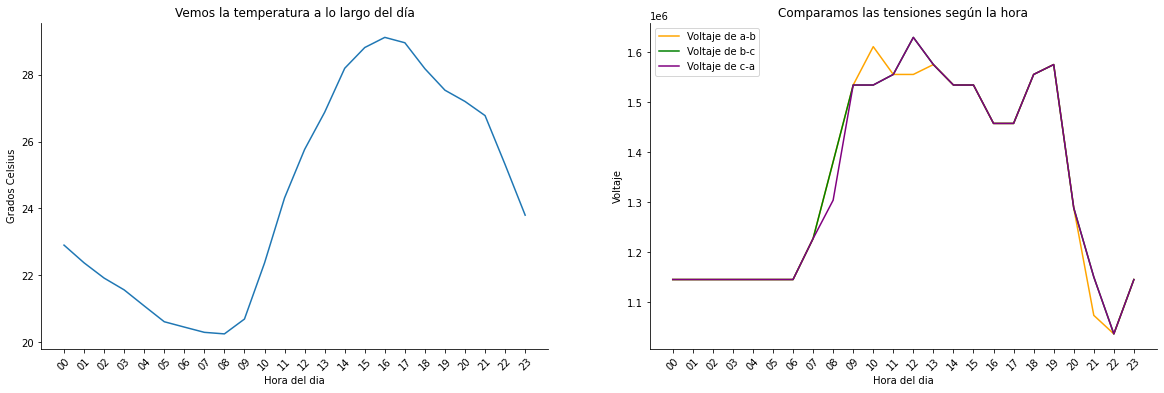

In [ ]:
#Graficamos temperaturas y tensiones según la hora en los días que hubo cortes de servicio
plt.figure(figsize=(20,6))
plt.subplot(1,2,1),sns.lineplot(data=ds_cortes_servicio,x='hora',y='temperature',ci=None)
plt.xticks(rotation=45)
plt.title("Vemos la temperatura a lo largo del día")
plt.xlabel('Hora del dia')
plt.ylabel('Grados Celsius')
plt.subplot(1,2,2),sns.lineplot(data=ds_cortes_servicio,x='hora',y='Vab',ci=None, color='ORANGE', label='Voltaje de a-b')
plt.subplot(1,2,2),sns.lineplot(data=ds_cortes_servicio,x='hora',y='Vbc',ci=None, color='GREEN', label='Voltaje de b-c')
plt.subplot(1,2,2),sns.lineplot(data=ds_cortes_servicio,x='hora',y='Vca',ci=None, color='PURPLE', label='Voltaje de c-a')
plt.xticks(rotation=45)
plt.title("Comparamos las tensiones según la hora")
plt.xlabel('Hora del dia')
plt.ylabel('Voltaje')
sns.despine()

In [ ]:
#Verifico duración de los cortes de servicio 
cantidad_corte=0
for anio in ds_cortes_servicio.index.year.unique():
  for dia in _ds_energia[(_ds_energia.corte_energia) & (_ds_energia.index.year== anio) ].index.dayofyear.unique():
    cantidad_corte=cantidad_corte+1
    hora_inicio_corte = _ds_energia[(_ds_energia.corte_energia) & (_ds_energia.index.dayofyear== dia)].Fecha.min()
    hora_fin_corte = _ds_energia[(_ds_energia.corte_energia) & (_ds_energia.index.dayofyear== dia)].Fecha.max() 
    duracion_corte=pd.to_timedelta(hora_fin_corte - hora_inicio_corte,'h')
    print('Corte de energia nro ' + str(cantidad_corte) + ' empezó el ' + str(hora_inicio_corte) + ' y terminó el ' + str(hora_fin_corte) + '.')
    print('Duración del corte: ' + str(pd.to_timedelta(hora_fin_corte - hora_inicio_corte,'h')))

Corte de energia nro 1 empezó el 2019-12-04 09:05:00 y terminó el 2019-12-04 17:35:00.
Duración del corte: 0 days 08:30:00
Corte de energia nro 2 empezó el 2019-12-05 11:00:00 y terminó el 2019-12-05 20:00:00.
Duración del corte: 0 days 09:00:00
Corte de energia nro 3 empezó el 2019-12-06 08:35:00 y terminó el 2019-12-06 20:35:00.
Duración del corte: 0 days 12:00:00
Corte de energia nro 4 empezó el 2019-12-07 08:45:00 y terminó el 2019-12-07 22:05:00.
Duración del corte: 0 days 13:20:00
Corte de energia nro 5 empezó el 2019-12-08 08:15:00 y terminó el 2019-12-08 23:00:00.
Duración del corte: 0 days 14:45:00
Corte de energia nro 6 empezó el 2019-12-09 09:20:00 y terminó el 2019-12-09 21:30:00.
Duración del corte: 0 days 12:10:00
Corte de energia nro 7 empezó el 2019-12-10 08:10:00 y terminó el 2019-12-10 23:15:00.
Duración del corte: 0 days 15:05:00
Corte de energia nro 8 empezó el 2019-12-31 16:50:00 y terminó el 2019-12-31 19:15:00.
Duración del corte: 0 days 02:25:00
Corte de energia

En la lista de arriba, vemos detallados los cortes de luz por día y su duración.
En diciembre hubo la mayor cantidad de cortes con las mayores duraciones.
A partir de enero vemos una disminución de los cortes y que muchos días (4 ocasiones) sólo registramos un corte momentáneo (menor a 5 minutos). 

En el siguiente gráfico vemos que el consumo se eleva los días laborales, pero tiene un comportamiento similar a los fines de semana. Los consumos máximos por día no coinciden con la temperatura máxima diaria, pero sí se observa un aumento del mismo a medida que la temperatura aumenta. 

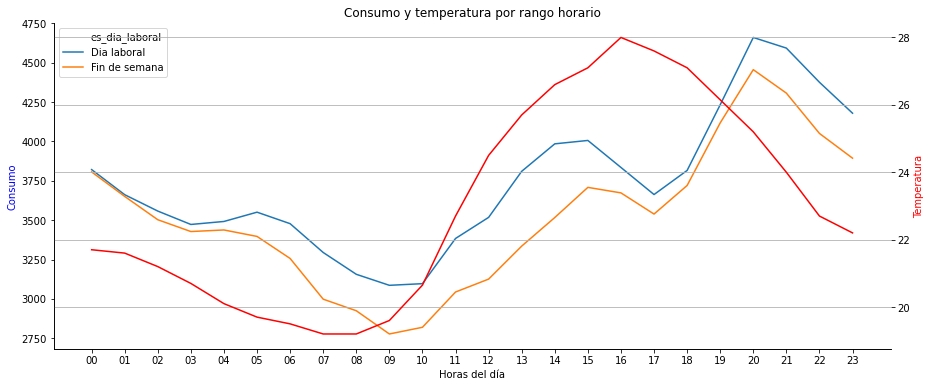

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
sns.lineplot(data=ds_unificado, x=ds_unificado.hora, y=ds_unificado.abs_Kwatts,ax=ax, ci=None, estimator=np.median, hue='es_dia_laboral')
ax2 = ax.twinx()
sns.lineplot(data=ds_unificado, x=ds_unificado.hora, y=ds_unificado.temperature,ax=ax2, color='red', ci=None, estimator=np.median)
sns.despine()
ax.set_title("Consumo y temperatura por rango horario")
ax.set_xlabel('Horas del día')
ax.set_ylabel('Consumo', color='b')
ax2.set_ylabel('Temperatura', color='r')  
plt.grid()
plt.show()

##Estacionalidad horaria y costumbres de la zona

Se puede analizar el gráfico de consumo horario cuando en la zona hay costumbre de "siesta", donde el horario de trabajo es de 8 a 12:30 y de 16:30 a 21

Se puede visualizar que a pesar de haber altas temperaturas el consumo baja en el horario de "siesta" hasta que se retoma la actividad laboral a las 17.

##Analisis de la potencia con respecto a la variable "velocidad de viento" 


Ahora vamos a comparar la potencia distribuida con la velocidad del viento. Si bien no hay una correlación entre ambas variables, esto no quiere decir que un viento fuerte no haya influido en los cortes de electricidad, ya que el viento sí puede influir en la estructura de la red. 

Visualizamos que en el rango de menor consumo (donde más cortes ocurrieron), la velocidad del viento es la más alta.

Con esto no podemos asegurar que los cortes se hayan producido por el viento, pero tampoco podemos descartar que no hayan tenido que ver.

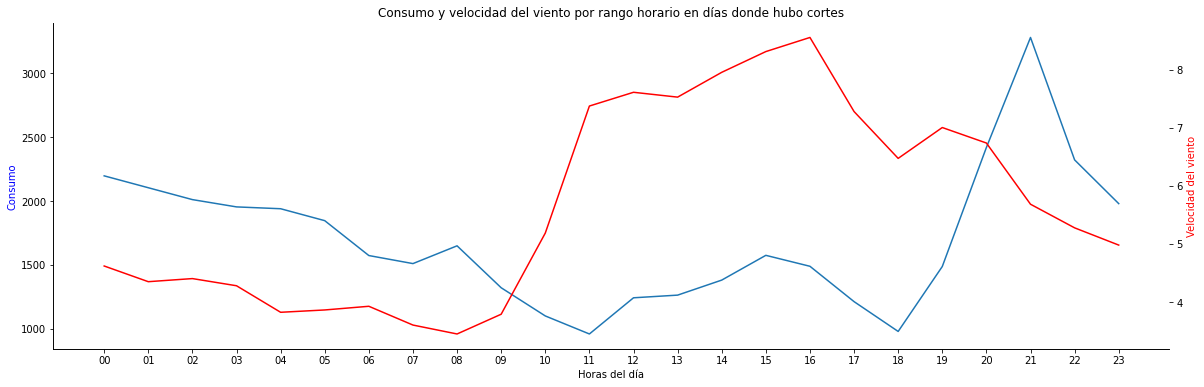

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data=ds_cortes_servicio, x='hora', y='abs_Kwatts',ax=ax, ci=None,palette='PuBu')
ax2 = ax.twinx()
sns.lineplot(data=ds_cortes_servicio, x='hora', y='windspeed',ax=ax2, color='red', ci=None,palette='RdGy')
sns.despine()
ax.set_title("Consumo y velocidad del viento por rango horario en días donde hubo cortes")
ax.set_xlabel('Horas del día')
ax.set_ylabel('Consumo', color='b')
ax2.set_ylabel('Velocidad del viento', color='r')
plt.show()

##Analisis Sobre factor de potencia
Se trabaja sobre el valor absoluto de la varaible 'Factor Potencia-A'

Se determinaron dos valores sobre el factor de potencia, teniendo como al 1 (uno) como valor ideal. Estos valores seleccionados son .95 y .90

Si determinamos que .95 seria el factor de potencia que la empresa distribuidora se compromete a entregar/controlar y un límite inferior de seguridad de .90


Se crean dos vectores de valor constante (0.95 y 0.90)



In [ ]:
_lst_potencia_contrato = np.full(_ds_energia.abs_Potencia.shape[0],0.95)
_lst_potencia_limite_inf = np.full(_ds_energia.abs_Potencia.shape[0],0.90)

Se grafica estas constantes sobre el factor de potencia para todos los días del set de datos.


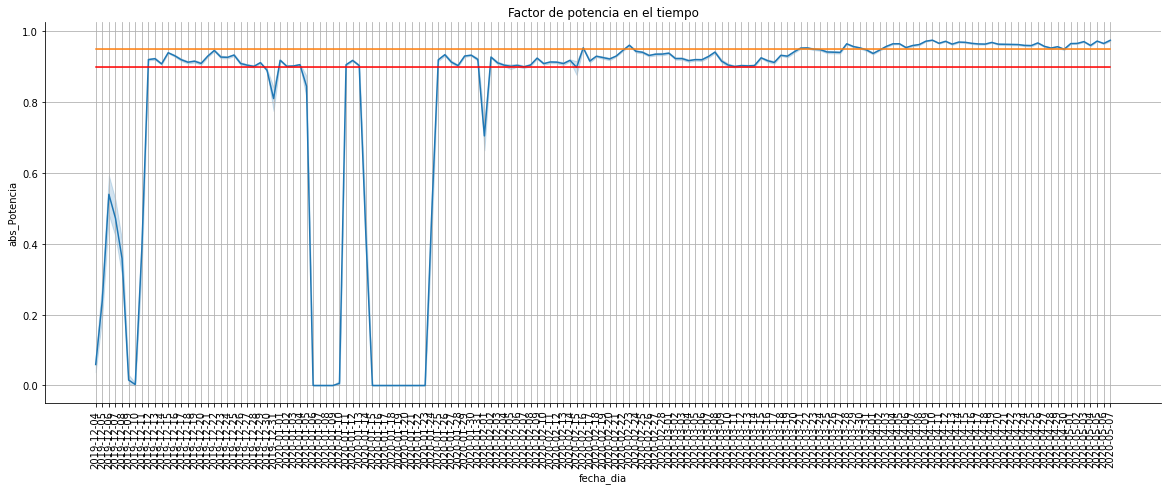

In [ ]:
plt.figure(figsize=(20,7))

sns.lineplot(data=_ds_energia,x=_ds_energia.fecha_dia, y=_ds_energia.abs_Potencia)
sns.lineplot(data=_ds_energia,x=_ds_energia.fecha_dia, y=_lst_potencia_contrato)
sns.lineplot(data=_ds_energia,x=_ds_energia.fecha_dia, y=_lst_potencia_problema_reac, color='red')

plt.title("Factor de potencia en el tiempo")

plt.xticks(rotation=90)
sns.despine()
plt.grid()
plt.show()


Se puede visualizar que durante los meses de instalación y puesta en funcionamiento de la línea troncal el factor de potencia se encuentra por debajo del 0.95. Lo que indica que hay mucha corriente circulando en la red que no se utiliza o no hay capacitores que reduzcan este valor.

Para la fecha en que comienza la cuarentena, se puede visualizar que el factor de potencia supera el .95 esto indica que efectivamente los comercios/industrias se ven detenidas en su funcionamiento y todos los electrodomésticos/maquinas con motores no esta encendidos lo que hace que mejore el factor de potencia.


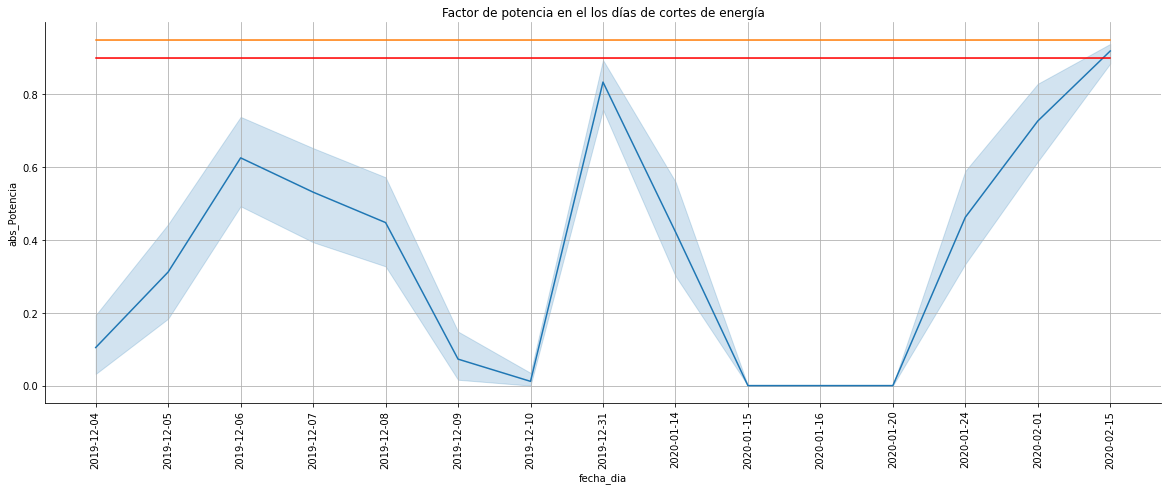

In [ ]:
_lst_potencia_contrato_cortes = np.full(ds_cortes_servicio.abs_Potencia.shape[0],0.95)
_lst_potencia_limite_inf_cortes = np.full(ds_cortes_servicio.abs_Potencia.shape[0],0.90)

plt.figure(figsize=(20,7))

sns.lineplot(data=ds_cortes_servicio,x=ds_cortes_servicio.fecha_dia, y=ds_cortes_servicio.abs_Potencia)
sns.lineplot(data=ds_cortes_servicio,x=ds_cortes_servicio.fecha_dia, y=_lst_potencia_contrato_cortes)
sns.lineplot(data=ds_cortes_servicio,x=ds_cortes_servicio.fecha_dia, y=_lst_potencia_limite_inf_cortes, color='red')

plt.title("Factor de potencia en el los días de cortes de energía")

plt.xticks(rotation=90)
sns.despine()
plt.grid()
plt.show()

Se puede visualizar que los días que hubo corte de energía, el factor de potencia se encontraba siempre por debajo del mínimo que la red deberia controlar para tener un buen uso y entregar la potencia activa contratada. 